# 사인 함수 예측하기

## 랜덤하게 가중치를 적용해 사인곡선 그리기

정현파는 `torch.linspace` 함수를 사용하여 -π와 π 사이에 동일한 간격으로 1000개의 점으로 구성된 텐서를 생성하여 생성됩니다. 그런 다음 `torch.sin` 함수를 사용하여 텐서에서 각 점의 사인을 계산합니다. 결과 텐서는 사인파의 y 값입니다.

랜덤 커브는 정규 분포에서 랜덤 숫자를 생성하는 `torch.randn` 함수를 사용하여 네 개의 난수인 a, b, c, d를 사용하여 생성됩니다. 랜덤 커브는 랜덤 숫자와 사인파 텐서의 x 값을 사용하여 3차 다항식을 계산하여 생성됩니다. 결과 텐서는 랜덤 커브의 y 값입니다.

그런 다음 `matplotlib` 라이브러리를 사용하여 사인파와 랜덤 곡선을 플롯합니다. `plt.subplot` 함수는 사인파와 랜덤 곡선에 대한 두 개의 하위 플롯을 만드는 데 사용됩니다. `plt.title` 함수는 각 하위 플롯의 제목을 설정하는 데 사용됩니다. `plt.plot` 함수는 각 곡선의 x 및 y 값을 플롯하는 데 사용됩니다. 마지막으로 `plt.show` 함수는 플롯을 표시하는 데 사용됩니다.

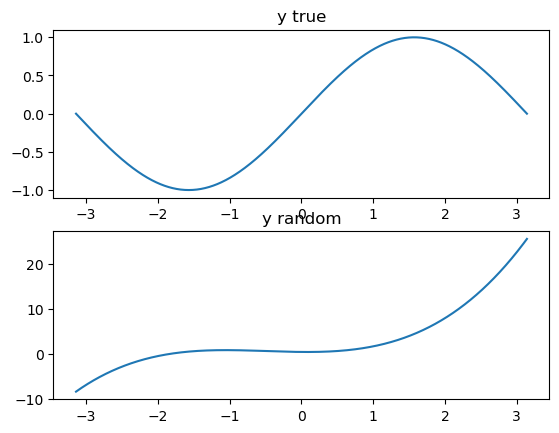

In [2]:
import math
import torch
import matplotlib.pyplot as plt

x = torch.linspace(-math.pi, math.pi, 1000)

y = torch.sin(x)

a = torch.randn(())
b = torch.randn(())
c = torch.randn(())
d = torch.randn(())

y_random = a*x**3 + b*x**2 + c*x + d

plt.subplot(2,1,1)
plt.title('y true')
plt.plot(x, y)

plt.subplot(2,1,2)
plt.title('y random')
plt.plot(x, y_random)

plt.show()

## 가중치를 학습시켜 사인곡선 그리기

임의의 입방 다항식을 생성한 다음 경사 하강을 사용하여 데이터에 가장 잘 맞는 다항식의 계수를 찾습니다. 그런 다음 결과 다항식을 원본 데이터 및 임의의 곡선과 함께 플롯합니다.

이 코드는 경사 하강 알고리즘의 단계 크기를 제어하는 하이퍼파라미터인 학습 속도를 정의하는 것으로 시작합니다. 그런 다음 `for` 루프는 경사 하강 알고리즘이 실행되는 횟수를 제어하는 하이퍼파라미터인 고정된 횟수의 에포크에 걸쳐 반복합니다.

루프 내부에서는 계수 `a`, `b`, `c`, `d`와 입력 데이터 `x`를 사용하여 3차 다항식을 계산합니다. 그런 다음 손실은 예측된 출력 `y_pred`와 실제 출력 `y` 사이의 제곱 차이의 합으로 계산됩니다. `if` 문은 100에포크마다 손실을 출력하는 데 사용됩니다.

그런 다음 계수에 대한 손실의 기울기를 계산하기 위해 손실값을 미분합니다. 미분을 계산하는 방법은 각 계수에 대한 손실 함수의 편미분을 계산하는 것입니다. 이 코드에서는 다항식의 계수 `a`, `b`, `c`, `d`에 대한 손실 함수의 편미분을 계산합니다. 

편미분은 다른 변수를 고정하고 한 변수에 대한 미분을 계산하는 것입니다. 이 코드에서는 각 계수에 대한 손실 함수의 편미분을 계산하기 위해 `grad_y_pred` 변수를 먼저 계산합니다. `grad_y_pred`는 예측된 출력 `y_pred`와 실제 출력 `y` 사이의 제곱 차이의 기울기를 계산합니다. 

그런 다음 `grad_a`, `grad_b`, `grad_c`, `grad_d` 변수를 계산합니다. 이 변수는 각 계수에 대한 손실 함수의 편미분을 계산합니다. 이 코드에서는 `grad_a`는 `grad_y_pred`와 `x`의 3차 항을 곱한 값의 합으로 계산됩니다. `grad_b`는 `grad_y_pred`와 `x`의 2차 항을 곱한 값의 합으로 계산됩니다. `grad_c`는 `grad_y_pred`와 `x`의 1차 항을 곱한 값의 합으로 계산됩니다. `grad_d`는 `grad_y_pred`의 합으로 계산됩니다.

마지막으로, 계수에 대한 손실 함수의 기울기를 사용하여 경사 하강법을 사용하여 모델 파라미터를 업데이트합니다. 그런 다음 기울기는 기울기 하강 알고리즘을 사용하여 계수를 업데이트하는 데 사용됩니다. `-=` 연산자는 계수를 제자리에서 업데이트하는 데 사용됩니다.

마지막으로, 결과 다항식은 `matplotlib` 라이브러리를 사용하여 원본 데이터 및 임의의 곡선과 함께 플롯됩니다. `plt.subplot` 함수는 원본 데이터, 예측된 출력, 임의 곡선 등 3개의 하위 플롯을 생성하는 데 사용됩니다. `plt.title` 함수는 각 하위 플롯의 제목을 설정하는 데 사용됩니다. `plt.plot` 함수는 각 커브의 x 및 y 값을 플롯하는 데 사용됩니다. `plt.tight_layout` 함수는 하위 플롯 사이의 간격을 조정하는 데 사용됩니다. 마지막으로 `plt.show` 함수는 플롯을 표시하는 데 사용됩니다.

가독성 및 성능과 관련하여 코드를 개선할 수 있는 방법으로는 각 코드 줄의 목적을 설명하는 주석을 추가하고, 보다 설명적인 변수 이름을 사용하고, 다항식 계산을 위해 PyTorch의 내장 함수를 사용하여 코드를 속도에 맞게 최적화하는 것 등이 있습니다. 또한 단순한 경사 하강보다 더 빠르고 안정적으로 수렴할 수 있는 Adam 또는 Adagrad와 같은 더 정교한 최적화 알고리즘을 사용하도록 코드를 수정할 수도 있습니다.

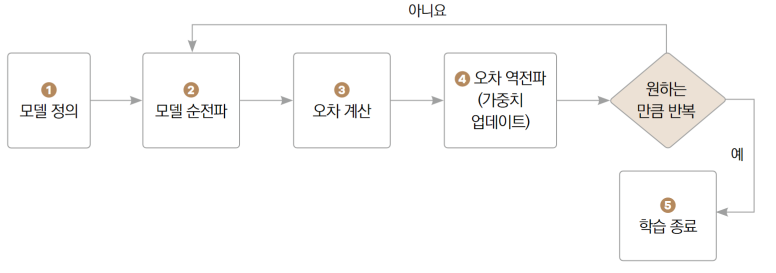

epoch1 loss:3980.52978515625
epoch501 loss:647.3812255859375
epoch1001 loss:236.43797302246094
epoch1501 loss:88.36190795898438
epoch2001 loss:34.88066864013672
epoch2501 loss:15.513019561767578
epoch3001 loss:8.477766036987305
epoch3501 loss:5.91339111328125
epoch4001 loss:4.974967956542969
epoch4501 loss:4.63007116317749


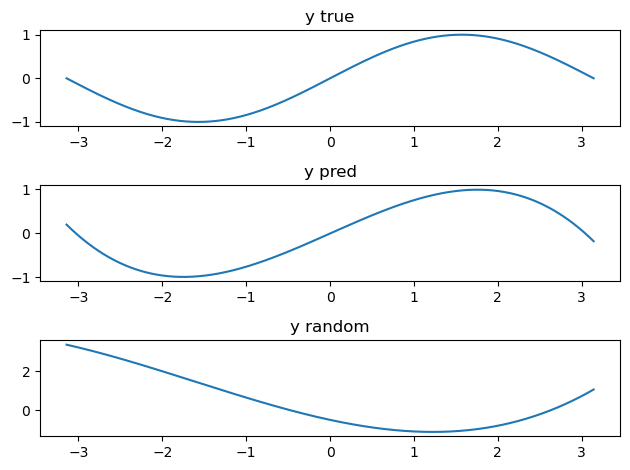

In [25]:
learning_rate = 1e-6

a = torch.randn(())
b = torch.randn(())
c = torch.randn(())
d = torch.randn(())

y_random = a*x**3 + b*x**2 + c*x + d

for epoch in range(5000):
    y_pred = a*x**3 + b*x**2 + c*x + d
    
    loss = (y_pred - y).pow(2).sum().item()
    if epoch % 500 == 0:
        print(f'epoch{epoch+1} loss:{loss}')
        
    grad_y_pred = 2.0*(y_pred-y)
    grad_a = (grad_y_pred*x**3).sum()
    grad_b = (grad_y_pred*x**2).sum()
    grad_c = (grad_y_pred*x).sum()
    grad_d = grad_y_pred.sum()
    
    a -= learning_rate*grad_a
    b -= learning_rate*grad_b
    c -= learning_rate*grad_c
    d -= learning_rate*grad_d
    
    
plt.subplot(3,1,1)
plt.title('y true')
plt.plot(x, y)

plt.subplot(3,1,2)
plt.title('y pred')
plt.plot(x, y_pred)

plt.subplot(3,1,3)
plt.title('y random')
plt.plot(x, y_random)

plt.tight_layout()
plt.show()    

Adam 옵티마이저를 다항식의 계수를 최적화하는 데 사용합니다.

`for` 루프는 고정된 수의 에포크에 걸쳐 반복합니다. 루프 내부에서 계수 `a`, `b`, `c`, `d`와 입력 데이터 `x`를 사용하여 3차 다항식을 계산합니다. 그런 다음 `nn.MSELoss()` 함수를 사용하여 예측된 출력 `y_pred`와 실제 출력 `y` 사이의 평균 제곱 오차 손실을 계산합니다. 

그런 다음 계수에 대한 손실의 기울기를 PyTorch의 자동 미분 기능을 사용하여 계산합니다. 그런 다음 이 그래디언트를 사용하여 아담 옵티마이저의 `step()` 함수를 사용하여 계수를 업데이트합니다.

epoch1 loss:99.69725036621094
epoch501 loss:17.076766967773438
epoch1001 loss:1.4341224431991577
epoch1501 loss:0.15322916209697723
epoch2001 loss:0.09082755446434021
epoch2501 loss:0.06994970142841339
epoch3001 loss:0.05211953818798065
epoch3501 loss:0.03760392963886261
epoch4001 loss:0.02639726549386978
epoch4501 loss:0.018037330359220505


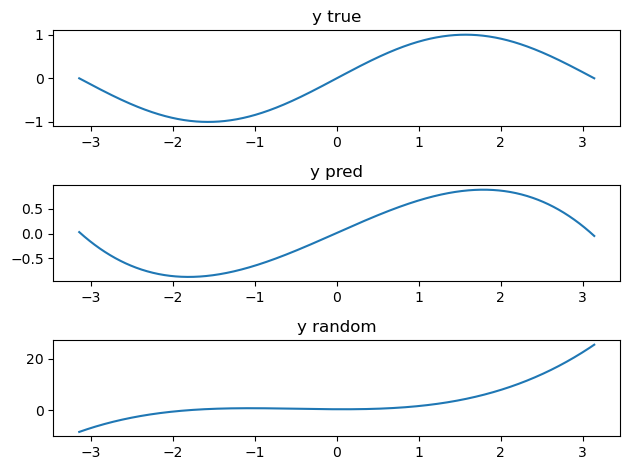

In [21]:
import torch.optim as optim
from torch import nn

learning_rate = 0.001

a = nn.Parameter(torch.randn(()))
b = nn.Parameter(torch.randn(()))
c = nn.Parameter(torch.randn(()))
d = nn.Parameter(torch.randn(()))

optimizer = optim.Adam([a, b, c, d], lr=learning_rate)
loss_fn = nn.MSELoss()

for epoch in range(5000):
    y_pred = a*x**3 + b*x**2 + c*x + d
    
    loss = loss_fn(y_pred, y)
    if epoch % 500 == 0:
        print(f'epoch{epoch+1} loss:{loss.item()}')
        
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
plt.subplot(3,1,1)
plt.title('y true')
plt.plot(x, y)

plt.subplot(3,1,2)
plt.title('y pred')
plt.plot(x, y_pred.detach().numpy())

plt.subplot(3,1,3)
plt.title('y random')
plt.plot(x, y_random)

plt.tight_layout()
plt.show()

# 보스턴 집값 예측하기 : 회귀분석

## 데이터 살펴보기

## 데이터 불러오기

In [2]:
import pandas as pd

df = pd.read_csv('./datasets/BostonHousing.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [30]:
df.shape

(506, 14)

## 모델 정의 및 학습하기

PyTorch를 사용하여 간단한 신경망을 구현하였고 신경망은 입력된 특징을 기반으로 데이터 세트의 목표 변수를 예측하는 데 사용됩니다. 이 코드는 두 개의 선형 레이어와 ReLU 활성화 함수가 있는 신경망 모델을 정의합니다. 입력 레이어에는 데이터 세트의 입력 특징 수에 해당하는 13개의 노드가 있습니다. 출력 레이어에는 목표 변수에 해당하는 노드가 1개 있습니다.

그런 다음 코드는 판다 데이터 프레임에서 입력 데이터와 목표 데이터를 로드합니다. 입력 데이터는 `X` 변수에 저장되고 대상 데이터는 `Y` 변수에 저장됩니다. 그런 다음 코드에서 배치 크기와 학습 속도 하이퍼파라미터를 정의합니다.

아담 옵티마이저는 신경망 모델을 최적화하는 데 사용됩니다. 최적화 도구는 모델 매개변수와 학습 속도 하이퍼파라미터로 초기화됩니다. 그런 다음 `for` 루프가 고정된 횟수의 에포크에 걸쳐 반복됩니다.

루프 내에서 입력 데이터와 대상 데이터는 `batch_size` 크기의 배치로 분할됩니다. 입력 데이터는 `torch.FloatTensor` 함수를 사용하여 PyTorch 텐서로 변환됩니다. 그런 다음 `optim.zero_grad()` 함수를 사용하여 최적화 그래디언트를 0으로 설정합니다. 그런 다음 `model(x)` 함수를 사용하여 입력 데이터에 대한 예측을 수행하는 데 모델을 사용합니다. 그런 다음 `nn.MSELoss()` 함수를 사용하여 예측된 출력과 실제 출력 사이의 평균 제곱 오차 손실을 계산합니다. 그런 다음 모델 파라미터에 대한 손실의 기울기를 PyTorch의 자동 미분 기능을 사용하여 계산합니다. 그런 다음 이 기울기를 사용하여 옵티마이저의 `step()` 함수를 사용하여 모델 파라미터를 업데이트합니다.

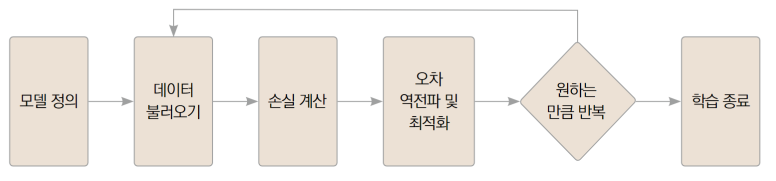

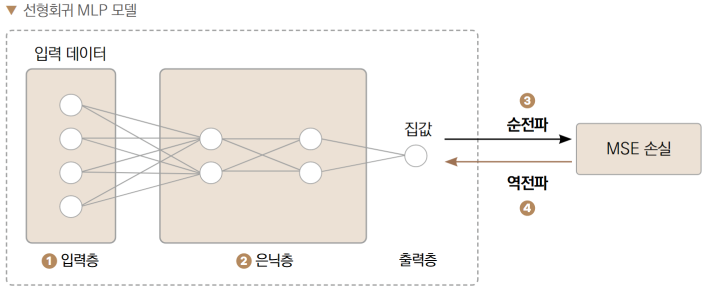

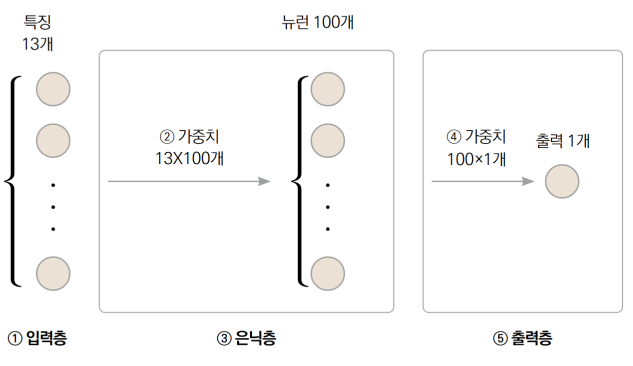

In [25]:
import torch
import torch.nn as nn
from torch.optim.adam import Adam

device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [34]:
import torch
import torch.nn as nn
from torch.optim.adam import Adam

model = nn.Sequential(
    nn.Linear(13, 256),
    nn.ReLU(),
    nn.Linear(256, 1)
)

X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values

batch_size = 100
learning_rate = 0.001

optim = Adam(model.parameters(), lr=learning_rate)

for epoch in range(200):
    
    for i in range(len(X)//batch_size):
        start = i*batch_size
        end = start + batch_size
        
        x = torch.FloatTensor(X[start:end])
        y = torch.FloatTensor(Y[start:end])        
        
        optim.zero_grad()
        
        preds = model(x)
        loss = nn.MSELoss()(preds, y)
        loss.backward()
        optim.step()
        
    if epoch% 20 == 0:
        print(f'epoch {epoch+1} loss:{loss.item()}')

epoch 1 loss:410.1900634765625
epoch 21 loss:40.64927291870117
epoch 41 loss:38.94829559326172
epoch 61 loss:38.36823272705078
epoch 81 loss:37.87771987915039
epoch 101 loss:37.91201400756836
epoch 121 loss:37.73280715942383
epoch 141 loss:37.61093521118164
epoch 161 loss:37.79613494873047
epoch 181 loss:49.487606048583984


## 모델 성능 평가하기

In [20]:
prediction = model(torch.FloatTensor(X[0, 0:13]))
real = Y[0]
print(f'prediction:{prediction.item()} real:{real}')

prediction:28.461423873901367 real:24.0


# 손끌씨 분류하기 : 다중분류

## 데이터 살펴보기

MNIST 데이터 세트는 이미지 분류 작업의 벤치마크 데이터 세트로 일반적으로 사용되는 손으로 쓴 숫자의 모음입니다. 이 코드는 `torchvision.datasets.mnist` 모듈을 사용하여 데이터 세트를 로드하고 `torchvision.transforms.ToTensor` 함수를 사용하여 이미지를 PyTorch 텐서(Tensor)로 변환합니다.

`MNIST` 함수를 사용하여 훈련 및 테스트 데이터 세트를 로드합니다. `root` 매개 변수는 데이터 디렉터리 경로를 지정하고, `train` 매개 변수는 학습 또는 테스트 데이터 세트를 로드할지 여부를 지정하며, `download` 매개 변수는 데이터 세트가 아직 다운로드되지 않은 경우 다운로드할지 여부를 지정하고, `transform` 매개 변수는 이미지에 적용 할 변환을 지정합니다.

`ToTensor` 변환은 이미지를 PyTorch 텐서로 변환하고 픽셀 값을 [0, 1] 범위로 스케일링합니다. 이 변환은 파이토치 모델이 입력 데이터가 텐서 형식일 것으로 예상하기 때문에 필요합니다.

In [22]:
import matplotlib.pyplot as plt
from torchvision.datasets.mnist import MNIST
from torchvision.transforms import ToTensor

data_path = '/home/restful3/datasets/torch'

training_data = MNIST(root=data_path, train=True, download=True, transform=ToTensor())
test_data = MNIST(root=data_path, train=False, download=True, transform=ToTensor())

print(len(training_data))
print(len(test_data))

60000
10000


In [13]:
type(training_data)

torchvision.datasets.mnist.MNIST

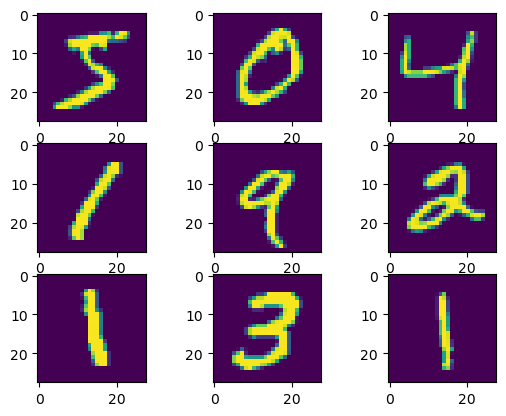

In [14]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(training_data.data[i])
plt.show()    

## 데이터 불러오기

In [28]:
from torch.utils.data.dataloader import DataLoader

train_loader = DataLoader(training_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

## 모델 정의 및 학습하기

PyTorch를 사용하여 MNIST 데이터 세트에서 손으로 쓴 숫자를 분류하는 간단한 신경망의 구현입니다. 신경망 모델은 ReLU 활성화 함수가 있는 세 개의 선형 레이어로 구성됩니다. 입력 레이어에는 784개의 노드가 있으며, 이는 각 이미지의 픽셀 수에 해당합니다. 출력 레이어에는 10개의 노드가 있으며, 이는 가능한 클래스 수(숫자 0-9)에 해당합니다.

이 코드는 `nn.Sequential` 함수를 사용하여 신경망 모델을 정의하는 것으로 시작합니다. 선형 레이어를 정의하는 데는 `nn.Linear` 함수를 사용하고, ReLU 활성화 함수를 정의하는 데는 `nn.ReLU` 함수를 사용합니다. `model.to(device)` 함수는 사용 가능한 경우 모델을 GPU로 이동하는 데 사용됩니다.

아담 옵티마이저는 신경망 모델을 최적화하는 데 사용됩니다. 최적화기는 모델 매개변수와 학습 속도 하이퍼파라미터 `lr`로 초기화됩니다.

그런 다음 `for` 루프가 고정된 횟수의 에포크에 걸쳐 반복됩니다. 루프 내부에서 훈련 데이터는 `train_loader` 객체를 사용하여 일괄적으로 로드됩니다. 그런 다음 `데이터` 및 `라벨` 변수는 `to(device)` 함수를 사용하여 가능한 경우 GPU로 이동됩니다. 옵티마이저 그라데이션을 0으로 설정하려면 `optim.zero_grad()` 함수를 사용합니다. 그런 다음 입력 데이터는 `torch.reshape` 함수를 사용하여 평탄화되고 모델을 통과하여 예측을 생성합니다. `nn.CrossEntropyLoss()` 함수는 예측된 출력과 실제 출력 사이의 손실을 계산하는 데 사용됩니다. 그런 다음 모델 파라미터에 대한 손실의 기울기를 PyTorch의 자동 미분 기능을 사용하여 계산합니다. 그런 다음 이 기울기를 사용하여 옵티마이저의 `step()` 함수를 사용하여 모델 파라미터를 업데이트합니다.

In [16]:
import torch
import torch.nn as nn
from torch.optim.adam import Adam

device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [35]:
model = nn.Sequential(
    nn.Linear(784, 64),
    nn.ReLU(),
    nn.Linear(64, 64),
    nn.ReLU(),
    nn.Linear(64, 10)
)

model.to(device)

lr = 1e-3
optim = Adam(model.parameters(), lr=lr)

for epoch in range(20):
    for data, label in train_loader:
        optim.zero_grad()        
        
        data = torch.reshape(data, (-1, 784)).to(device)
        preds = model(data)
        
        loss = nn.CrossEntropyLoss()(preds, label.to(device))
        loss.backward()
        optim.step()        

    if device == 'cuda':
        loss = loss.cpu()
        
    print(f'epoch {epoch+1}, loss : {loss.item()}')

epoch 1, loss : 0.2179058939218521
epoch 2, loss : 0.03296136111021042
epoch 3, loss : 0.013965410180389881
epoch 4, loss : 0.1521666795015335
epoch 5, loss : 0.014969607815146446
epoch 6, loss : 0.07293885946273804
epoch 7, loss : 0.06784896552562714
epoch 8, loss : 0.018157294020056725
epoch 9, loss : 0.012755535542964935
epoch 10, loss : 0.00201608520001173
epoch 11, loss : 0.0004985005944035947
epoch 12, loss : 0.0006335637299343944
epoch 13, loss : 0.05642077699303627
epoch 14, loss : 0.09964755177497864
epoch 15, loss : 0.009492759592831135
epoch 16, loss : 0.0017885725246742368
epoch 17, loss : 0.023990565910935402
epoch 18, loss : 5.3061408834764734e-05
epoch 19, loss : 0.12012697756290436
epoch 20, loss : 0.017242342233657837


In [19]:
torch.save(model.state_dict(), './models/MNIST.pth')

In [38]:
model.load_state_dict(torch.load('./models/MNIST.pth', map_location=device))

num_corr = 0

with torch.no_grad():
    for data, label in test_loader:
        data = torch.reshape(data, (-1, 784)).to(device)

        output = model(data.to(device))
        _, preds = output.data.max(1)

        corr = preds.eq(label.to(device)).sum().item()
        num_corr += corr

    print(f'accuracy : {num_corr/len(test_data)}')

accuracy : 0.9758


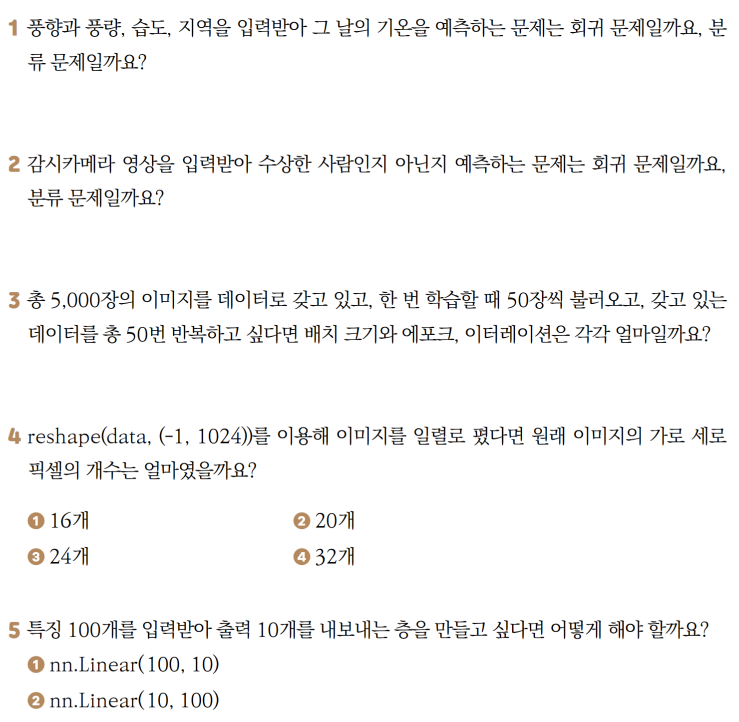